# Señales periódicas

**Cómo usar**:

* En el menú superior, click en `Cell`.
* Click en `Run All`.
* Al final de este documento se reproducirá la simulación.
* Disfrutar.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import Slider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import IPython.display as ipd
from scipy.io import wavfile

In [4]:
def ploteo(figura, lista_funciones, leyendas, x_label, y_label):
    """
    recibe una lista de listas de la forma:
    [[x, y, color_forma], [x2, y2, color_forma2]], [leyenda, leyenda1], x_label, y_label
    """
    plt.figure(figura, dpi=120)
    plt.plot(*lista_funciones)
    plt.legend(leyendas, loc=4)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.grid()
    plt.show()

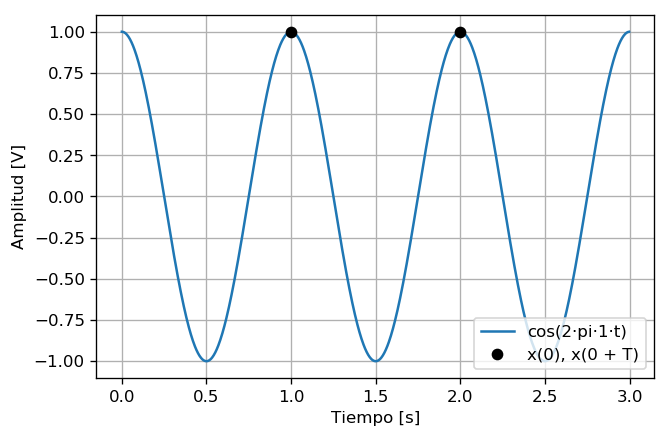

In [5]:
t = np.linspace(0, 3, 1000, endpoint=False)
x = np.cos(2 * np.pi * t)

lista_funciones = [t, x, 1, x[0], 'ko', 2, x[1], 'ko']
leyendas = ['cos(2·pi·1·t)', 'x(0), x(0 + T)']

ploteo(1, lista_funciones, leyendas, 'Tiempo [s]', 'Amplitud [V]')

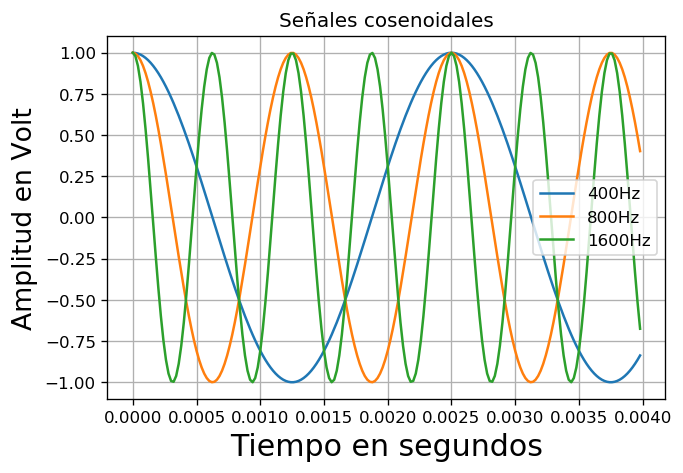

In [6]:
sr = 50000
frecuencias = [400, 800, 1600]
T = 2    # seconds
t = np.linspace(0, T, int( T * sr), endpoint=False) # time variable

cosenos = []
leyendas = []
for i, frec in enumerate(frecuencias):
    x = np.cos(2 * np.pi * frec * t)
    cosenos.append(x)
    leyendas.append(str(frec) + 'Hz')
    

plt.figure(1, dpi = 120)
plt.plot(t[0:200], cosenos[0][0:200], t[0:200], cosenos[1][0:200], t[0:200], cosenos[2][0:200])
plt.title('Señales cosenoidales')
plt.legend(leyendas)
plt.xlabel('Tiempo en segundos', fontsize=18)
plt.ylabel('Amplitud en Volt', fontsize=16)
plt.grid()

In [7]:
sr = 50000
print('Coseno a 400 Hz')
ipd.Audio(cosenos[0], rate=sr)

Coseno a 400 Hz


In [8]:
sr = 50000
print('Coseno a 800 Hz')
ipd.Audio(cosenos[1], rate=sr)

Coseno a 800 Hz


In [9]:
sr = 50000
print('Coseno a 1600 Hz')
ipd.Audio(cosenos[2], rate=sr)

Coseno a 1600 Hz


In [10]:
def plot_señal(wA, wf, wphi):
    A = wA
    f = wf
    phi = wphi
    
    T = 1/f
    t = np.arange(0, 3, T/20)   # start,stop,step
    x = A * np.cos(2 * np.pi * f * t + phi)
     
    plt.figure(1, dpi=120)
    plt.subplot(121)
    plt.plot(t, x)
    plt.title('En el dominio del tiempo')
    plt.grid(True)
    plt.xlabel('Tiempo en segundos [s]', fontsize=12)
    plt.ylabel('Amplitud en Volt [A]', fontsize=12)
    plt.xlim([0, 3])
    plt.ylim([-5.5, 5.5])
    
    print('T = 1/f = ', round(1/f,2), 's')
    
    #freqs = [-f, f]
   # plt.figure(2, dpi=80)
    plt.subplot(122)
    plt.stem([f], [A])
    plt.title('En el dominio de la frecuencia')
    plt.grid(True)
    #plt.ylabel('Amplitud en Volt [A]', fontsize=16)
    plt.xlabel('Frecuencia en Hertz [Hz]', fontsize=12)
    plt.xlim(-1, 11)
    plt.ylim(-1, 6)
    plt.show()
    
    
wA = widgets.IntSlider(min=1,max=5,step=1,value=1, description='Amplitud [V]')
wf = widgets.IntSlider(min=1,max=10,step=1,value=1, description='Frec [Hz]')
wphi = widgets.FloatSlider(min=0,max=2*np.pi,step=np.pi/2,value=0, description='Fase [rad]')

interactive_plot = interactive(plot_señal, wA=wA, wf=wf, wphi=wphi)
output = interactive_plot.children[-1]
output.layout.height = '800px'
interactive_plot

interactive(children=(IntSlider(value=1, description='Amplitud [V]', max=5, min=1), IntSlider(value=1, descrip…